In [229]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [230]:
train_df = pd.read_csv('train.csv')
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [231]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [232]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [233]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [234]:
s = train_df['Survived'].value_counts(normalize=True)*100

In [235]:
s_df = pd.DataFrame({'Survival Status':s.index, 'Percentage':s.values})
# s_df = pd.DataFrame(s).reset_index()
# s_df.columns = ['Survival Status', 'Percentage']
s_df

,Survival Status,Percentage
0,0,61.616162
1,1,38.383838


In [236]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

Text(0.5, 1.0, 'Age Distribution')

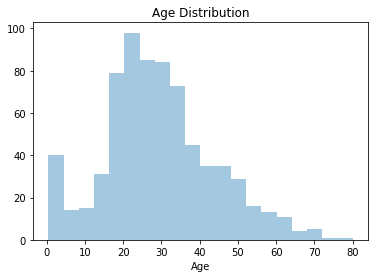

In [237]:
sns.distplot(train_df['Age'].dropna(), kde=False).set_title("Age Distribution")

In [256]:
train_df["agegrp"] = pd.cut(train_df["Age"], [0, 10, 20, 30, 40, 50, 60, 70, 80])

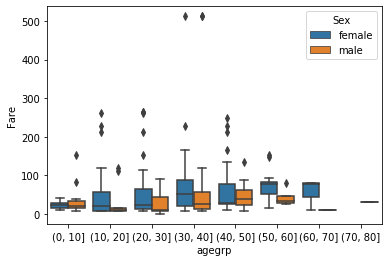

In [258]:
sns.boxplot(x = train_df[train_df.Survived == 1]["agegrp"], hue = train_df[train_df.Survived == 1]["Sex"], y = train_df[train_df.Survived == 1]["Fare"])

# sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

In [272]:
train_df.groupby(["agegrp", "Sex"])["Pclass"].value_counts(normalize=True).unstack()

Pclass                  1         2         3
agegrp   Sex                                 
(0, 10]  female  0.032258  0.258065  0.709677
         male    0.060606  0.272727  0.666667
(10, 20] female  0.282609  0.173913  0.543478
         male    0.072464  0.144928  0.782609
(20, 30] female  0.259259  0.345679  0.395062
         male    0.127517  0.221477  0.651007
(30, 40] female  0.436364  0.309091  0.254545
         male    0.250000  0.260000  0.490000
(40, 50] female  0.419355  0.322581  0.258065
         male    0.436364  0.163636  0.400000
(50, 60] female  0.785714  0.214286       NaN
         male    0.500000  0.321429  0.178571
(60, 70] female  0.666667       NaN  0.333333
         male    0.642857  0.214286  0.142857
(70, 80] male    0.600000       NaN  0.400000

In [265]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegrp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


In [264]:
train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)]['Age'].dropna()

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
10      4.0
11     58.0
15     55.0
22     15.0
25     38.0
39     14.0
43      3.0
44     19.0
52     49.0
53     29.0
56     21.0
58      5.0
61     38.0
66     29.0
68     17.0
79     30.0
84     17.0
85     33.0
88     23.0
98     34.0
106    21.0
123    32.5
133    29.0
136    19.0
141    22.0
       ... 
765    51.0
774    54.0
777     5.0
779    43.0
780    13.0
781    17.0
786    18.0
796    49.0
797    31.0
801    31.0
809    33.0
820    52.0
823    27.0
829    62.0
830    15.0
835    39.0
842    30.0
853    16.0
855    18.0
856    45.0
858    24.0
862    48.0
865    42.0
866    27.0
871    47.0
874    28.0
875    15.0
879    56.0
880    25.0
887    19.0
Name: Age, Length: 197, dtype: float64

Text(0.5, 1.0, 'Male')

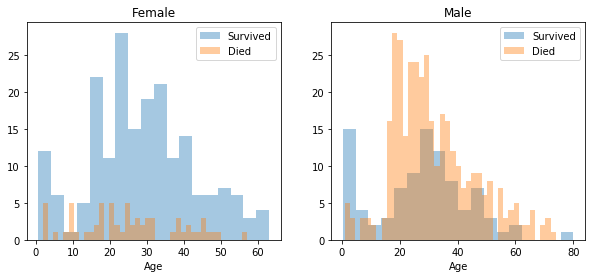

In [152]:
# Age and gender

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = sns.distplot(train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)]['Age'].dropna(), bins=18, label = 'Survived', ax= axes[0], kde = False)
ax = sns.distplot(train_df[(train_df.Sex == 'female') & (train_df.Survived == 0)]['Age'].dropna(), bins=40, label = 'Died', ax= axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)]['Age'].dropna(), bins=18, label = 'Survived', ax= axes[1], kde = False)
ax = sns.distplot(train_df[(train_df.Sex == 'male') & (train_df.Survived == 0)]['Age'].dropna(), bins=40, label = 'Died', ax= axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [162]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

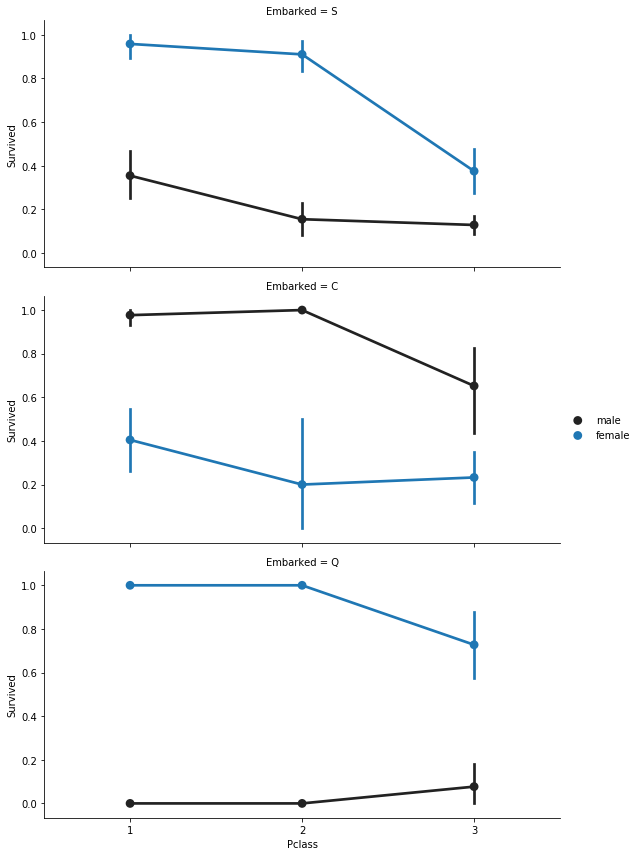

In [198]:
# Embarked, Passenger class, Gender

FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4, aspect=2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()